<a href="https://colab.research.google.com/github/Abhii67534/Walmart-sales-ml-project/blob/main/Stress_Level_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection
- Source: Structured Google Form survey
- Population: Students from various institutions, academic stages, and disciplines
- Sampling Method: Voluntary participation through social media groups, student communities, and direct outreach
- Location: Collected from diverse regions (can specify if country/region-specific)
- Time Frame: (Add date/month/year)

# Dataset Structure

The dataset maintains a tabular format with 8 columns:

| Column Name                 | Data Type                                     | Description                                                                 |
|-----------------------------|-----------------------------------------------|-----------------------------------------------------------------------------|
| **Academic Stage**          | Categorical (high school, undergraduate, postgraduate) | Educational level of the student, useful for analyzing stress differences by stage. |
| **Peer Pressure**           | Numerical (1–5 scale)                         | Influence of peers through competition, comparison, and social expectations — a notable driver of stress. |
| **Academic Pressure from Home** | Numerical (1–5 scale)                     | Extent of academic expectations or pressure exerted by family or household. |
| **Study Environment**       | Categorical (noisy, peaceful, disrupted)      | Quality of the study environment impacting focus and productivity.          |
| **Coping Strategy**         | Categorical (analyzing the problem with intellect, emotional breakdown, social support) | Methods students use to cope with stress and challenges. |
| **Bad Habits**              | Text / Multi-category (e.g., smoking, drinking, none) | Negative habits students may resort to under stress.                        |
| **Academic Competition**    | Numerical (1–5 scale)                         | Intensity of competition among peers, which can elevate stress levels.      |
| **Stress Index (Target Variable)** | Numerical (1–5 scale)                  | Self-reported stress level of the student, serving as the dependent variable for prediction. |

## Dataset Link --
- https://www.kaggle.com/datasets/poushal02/student-academic-stress-real-world-dataset

In [103]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as pd

data_path = "/content/drive/MyDrive/DATASETS/Walmart.csv"
df = pd.read_csv(data_path)

df.head(20)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1  05-02-2010    1643690.90             0        42.31       2.572   
1       1  12-02-2010    1641957.44             1        38.51       2.548   
2       1  19-02-2010    1611968.17             0        39.93       2.514   
3       1  26-02-2010    1409727.59             0        46.63       2.561   
4       1  05-03-2010    1554806.68             0        46.50       2.625   
5       1  12-03-2010    1439541.59             0        57.79       2.667   
6       1  19-03-2010    1472515.79             0        54.58       2.720   
7       1  26-03-2010    1404429.92             0        51.45       2.732   
8       1  02-04-2010    1594968.28             0        62.27       2.719   
9       1  09-04-2010    1545418.53             0        65.86       2.770   
10      1  16-04-2010    1466058.28             0        66.32       2.808   
11      1  23-04-2010    1391256.12             0        64.84       2.795   
12      1  30-04-2010    1425100.71             0        67.41       2.780   
13      1  07-05-2010    1603955.12             0        72.55       2.835   
14      1  14-05-2010    1494251.50             0        74.78       2.854   
15      1  21-05-2010    1399662.07             0        76.44       2.826   
16      1  28-05-2010    1432069.95             0        80.44       2.759   
17      1  04-06-2010    1615524.71             0        80.69       2.705   
18      1  11-06-2010    1542561.09             0        80.43       2.668   
19      1  18-06-2010    1503284.06             0        84.11       2.637   

           CPI  Unemployment  
0   211.096358         8.106  
1   211.242170         8.106  
2   211.289143         8.106  
3   211.319643         8.106  
4   211.350143         8.106  
5   211.380643         8.106  
6   211.215635         8.106  
7   211.018042         8.106  
8   210.820450         7.808  
9   210.622857         7.808  
10  210.488700         7.808  
11  210.439123         7.808  
12  210.389546         7.808  
13  210.339968         7.808  
14  210.337426         7.808  
15  210.617093         7.808  
16  210.896761         7.808  
17  211.176428         7.808  
18  211.456095         7.808  
19  211.453772         7.808

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [107]:
df.Date=pd.to_datetime(df["Date"], format='%d-%m-%Y')

###  Captures holiday shopping surge:
-  **Thanksgiving & Black Friday** — marks the start of peak shopping activity  
-  **Early December weeks** — strong gift-buying demand before Christmas  
-  **Excludes Dec 25–31** — avoids the post-Christmas dip and clearance effect  
-  Provides a **richer seasonal signal** than a single Christmas flag  

In [108]:
# Super Bowl dates
super_bowl_dates = pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'])

# Labor Day dates
labor_day_dates = pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'])

# Thanksgiving dates
thanksgiving_dates = pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'])

# Christmas Week (Dec 25–31 every year)
df['Is_Holiday_Season'] = df['Date'].apply(
    lambda x: 1 if (x.month == 11 or (x.month == 12 and x.day < 25)) else 0
)

# Create new binary columns
df['Is_SuperBowl'] = df['Date'].isin(super_bowl_dates).astype(int)
df['Is_LaborDay'] = df['Date'].isin(labor_day_dates).astype(int)
df['Is_Thanksgiving'] = df['Date'].isin(thanksgiving_dates).astype(int)


In [109]:
df["Day"]= df["Date"].dt.day
df["Month"]= df["Date"].dt.month
df["Year"]= df["Date"].dt.year

In [110]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Is_Holiday_Season  Is_SuperBowl  Is_LaborDay  \
0  211.096358         8.106                  0             0            0   
1  211.242170         8.106                  0             1            0   
2  211.289143         8.106                  0             0            0   
3  211.319643         8.106                  0             0            0   
4  211.350143         8.106                  0             0            0   

   Is_Thanksgiving  Day  Month  Year  
0                0    5      2  2010  
1                0   12      2  2010  
2                0   19      2  2010  
3                0   26      2  2010  
4                0    5      3  2010

In [111]:
df.drop(columns="Date",inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              6435 non-null   int64  
 1   Weekly_Sales       6435 non-null   float64
 2   Holiday_Flag       6435 non-null   int64  
 3   Temperature        6435 non-null   float64
 4   Fuel_Price         6435 non-null   float64
 5   CPI                6435 non-null   float64
 6   Unemployment       6435 non-null   float64
 7   Is_Holiday_Season  6435 non-null   int64  
 8   Is_SuperBowl       6435 non-null   int64  
 9   Is_LaborDay        6435 non-null   int64  
 10  Is_Thanksgiving    6435 non-null   int64  
 11  Day                6435 non-null   int32  
 12  Month              6435 non-null   int32  
 13  Year               6435 non-null   int32  
dtypes: float64(5), int32(3), int64(6)
memory usage: 628.5 KB


In [113]:
df[df.duplicated()]

Empty DataFrame
Columns: [Store, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment, Is_Holiday_Season, Is_SuperBowl, Is_LaborDay, Is_Thanksgiving, Day, Month, Year]
Index: []

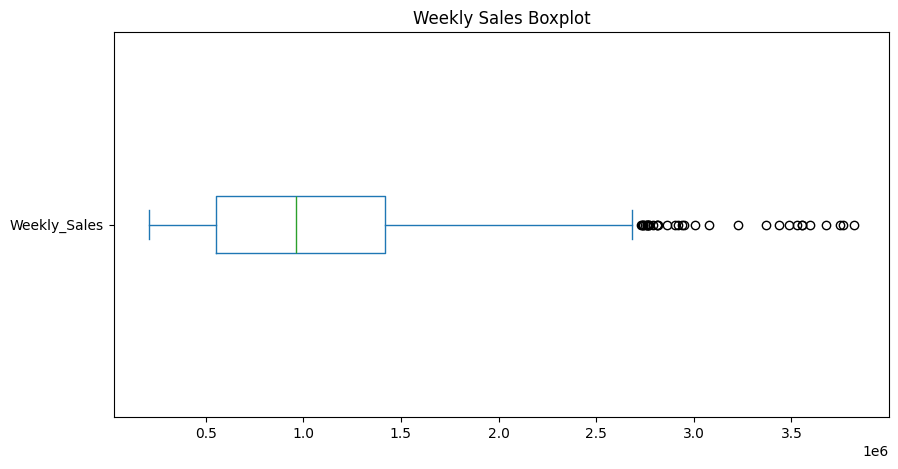

In [114]:
#Outliers
plt.figure(figsize=(10,5))
df['Weekly_Sales'].plot(kind='box', vert=False)
plt.title("Weekly Sales Boxplot")
plt.show()

We can see the outliers but those are actually the sales during holidays or peak sales days so we will not remove them to keep the real

# EDA

In [115]:
#Correlation
df.corr()

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store              1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales      -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag      -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature       -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price         6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI               -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment       2.235313e-01     -0.106176  1.096028e-02     0.101158   
Is_Holiday_Season  1.279955e-16      0.130655  7.664483e-02    -0.293822   
Is_SuperBowl      -6.168883e-18      0.008343  5.338539e-01    -0.200627   
Is_LaborDay       -2.165876e-16     -0.001177  5.338539e-01     0.110971   
Is_Thanksgiving    4.129062e-19      0.089549  4.343414e-01    -0.076878   
Day                1.478526e-15     -0.017409  4.452608e-02     0.026973   
Month              2.910676e-15      0.076143  1.229958e-01     0.235862   
Year               3.474318e-12     -0.018378 -5.678257e-02     0.064269   

                   Fuel_Price       CPI  Unemployment  Is_Holiday_Season  \
Store                0.060023 -0.209492      0.223531       1.279955e-16   
Weekly_Sales         0.009464 -0.072634     -0.106176       1.306553e-01   
Holiday_Flag        -0.078347 -0.002162      0.010960       7.664483e-02   
Temperature          0.144982  0.176888      0.101158      -2.938218e-01   
Fuel_Price           1.000000 -0.170642     -0.034684      -1.443373e-01   
CPI                 -0.170642  1.000000     -0.302020      -5.232895e-03   
Unemployment        -0.034684 -0.302020      1.000000       2.660633e-02   
Is_Holiday_Season   -0.144337 -0.005233      0.026606       1.000000e+00   
Is_SuperBowl        -0.076395 -0.003544      0.010962      -5.195828e-02   
Is_LaborDay          0.018078  0.001988     -0.006089      -5.195828e-02   
Is_Thanksgiving     -0.047349 -0.001824      0.008928       3.355423e-01   
Day                  0.028073  0.002684     -0.004233      -6.804124e-02   
Month               -0.042156  0.004980     -0.012746       5.538287e-01   
Year                 0.779470  0.074796     -0.241813      -2.071136e-01   

                   Is_SuperBowl   Is_LaborDay  Is_Thanksgiving           Day  \
Store             -6.168883e-18 -2.165876e-16     4.129062e-19  1.478526e-15   
Weekly_Sales       8.343093e-03 -1.177047e-03     8.954878e-02 -1.740946e-02   
Holiday_Flag       5.338539e-01  5.338539e-01     4.343414e-01  4.452608e-02   
Temperature       -2.006272e-01  1.109708e-01    -7.687759e-02  2.697332e-02   
Fuel_Price        -7.639483e-02  1.807776e-02    -4.734866e-02  2.807253e-02   
CPI               -3.544124e-03  1.988267e-03    -1.824322e-03  2.684300e-03   
Unemployment       1.096197e-02 -6.088600e-03     8.927550e-03 -4.233293e-03   
Is_Holiday_Season -5.195828e-02 -5.195828e-02     3.355423e-01 -6.804124e-02   
Is_SuperBowl       1.000000e+00 -2.142857e-02    -1.743420e-02 -7.822140e-02   
Is_LaborDay       -2.142857e-02  1.000000e+00    -1.743420e-02 -1.172347e-01   
Is_Thanksgiving   -1.743420e-02 -1.743420e-02     1.000000e+00  1.336073e-01   
Day               -7.822140e-02 -1.172347e-01     1.336073e-01  1.000000e+00   
Month             -2.010635e-01  1.153902e-01     1.674426e-01  1.519184e-02   
Year               6.422372e-03  6.422372e-03    -6.949538e-02  6.405867e-03   

                          Month          Year  
Store              2.910676e-15  3.474318e-12  
Weekly_Sales       7.614332e-02 -1.837754e-02  
Holiday_Flag       1.229958e-01 -5.678257e-02  
Temperature        2.358618e-01  6.426923e-02  
Fuel_Price        -4.215590e-02  7.794703e-01  
CPI                4.979672e-03  7.479573e-02  
Unemployment      -1.274559e-02 -2.418135e-01  
Is_Holiday_Season  5.538287e-01 -2.071136e-01  
Is_SuperBowl      -2.010635e-01  6.422372e-03  
Is_LaborDay        1.153902e-01  6.422372e-03  
Is_Thanksgiving

<Axes: >

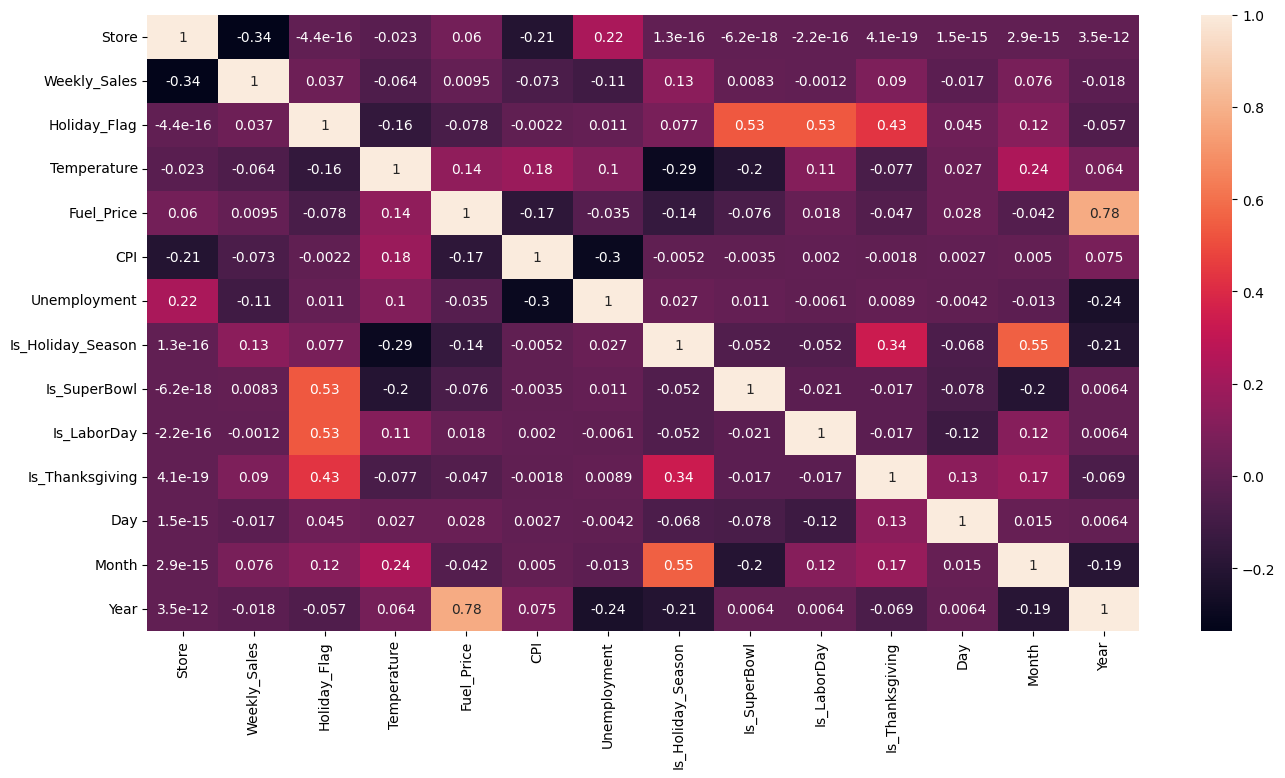

In [116]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr() , annot=True)

In [117]:
df.groupby("Is_Holiday_Season")['Weekly_Sales'].mean()

Is_Holiday_Season
0    1.020794e+06
1    1.254694e+06
Name: Weekly_Sales, dtype: float64

In [118]:
print(df.groupby("Is_Thanksgiving")['Weekly_Sales'].mean())
print(df.groupby("Is_SuperBowl")['Weekly_Sales'].mean())
print(df.groupby("Is_LaborDay")['Weekly_Sales'].mean())

Is_Thanksgiving
0    1.040946e+06
1    1.471273e+06
Name: Weekly_Sales, dtype: float64
Is_SuperBowl
0    1.046276e+06
1    1.079128e+06
Name: Weekly_Sales, dtype: float64
Is_LaborDay
0    1.047062e+06
1    1.042427e+06
Name: Weekly_Sales, dtype: float64


### Dropping `Year` and `Holiday_Flag`

- **Year**  
  - The `Year` column mainly acts as a proxy for long-term economic trends.  
  - However, we already have **economic indicators** (`Fuel_Price`, `CPI`, `Unemployment`) that capture these effects more directly.  
  - Keeping both `Year` and these variables introduces **multicollinearity**, where predictors overlap and distort model weights.  
  - Solution: Drop `Year` and rely on the true economic variables.

- **Holiday_Flag**  
  - `Holiday_Flag` is a **generic indicator** for whether a week is a holiday or not.  
  - But it **overlaps** with the more detailed binary flags we engineered (`Is_SuperBowl`, `Is_LaborDay`, `Is_Thanksgiving`, `Is_Holiday_Season`).  
  - Keeping it adds redundancy and risks **double-counting holiday effects**.  
  - Solution: Drop `Holiday_Flag` and keep the specific holiday features instead.

---

 By dropping these, we reduce collinearity and make our feature set more **interpretable and business-aligned**.


In [119]:
df.drop(columns=["Holiday_Flag","Year"],inplace=True)

In [120]:
df.head()

Store  Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
0      1    1643690.90        42.31       2.572  211.096358         8.106   
1      1    1641957.44        38.51       2.548  211.242170         8.106   
2      1    1611968.17        39.93       2.514  211.289143         8.106   
3      1    1409727.59        46.63       2.561  211.319643         8.106   
4      1    1554806.68        46.50       2.625  211.350143         8.106   

   Is_Holiday_Season  Is_SuperBowl  Is_LaborDay  Is_Thanksgiving  Day  Month  
0                  0             0            0                0    5      2  
1                  0             1            0                0   12      2  
2                  0             0            0                0   19      2  
3                  0             0            0                0   26      2  
4                  0             0            0                0    5      3

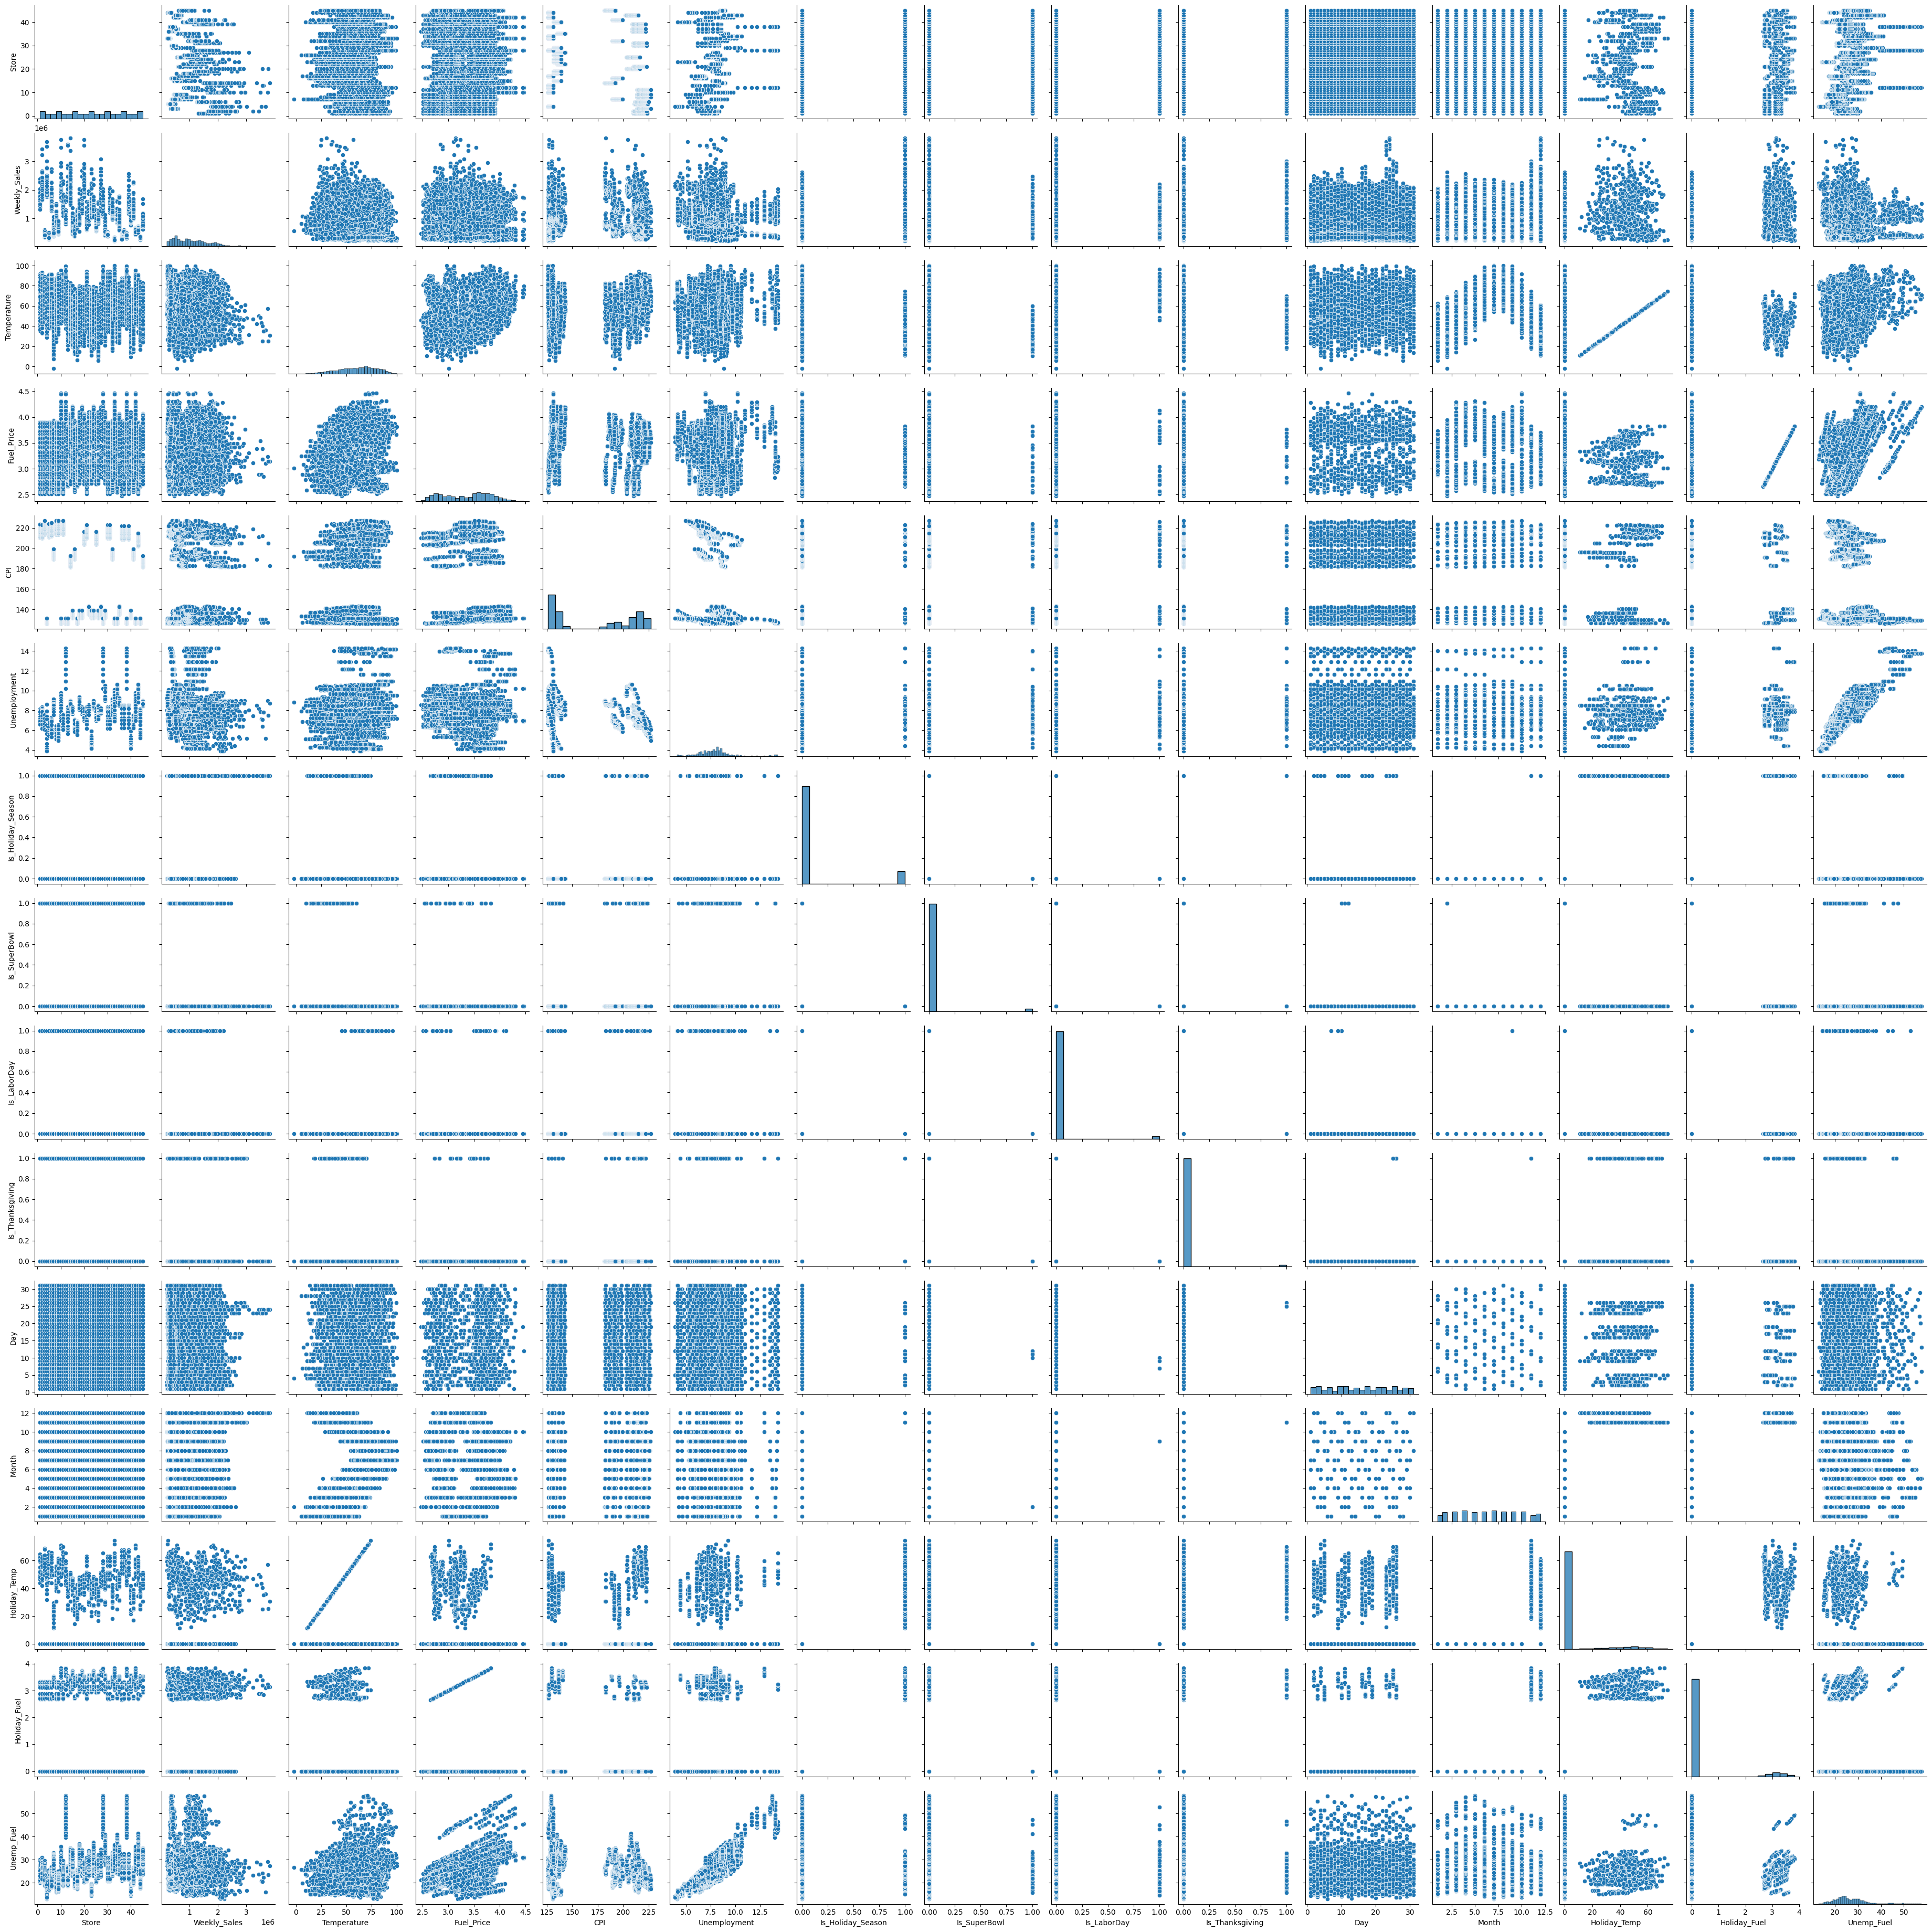

In [124]:
sns.pairplot(df)

In [125]:
import scipy.stats as stats

# Check skewness of target
print("Skewness (Weekly_Sales):", stats.skew(df['Weekly_Sales']))

Skewness (Weekly_Sales): 0.6682059921068103


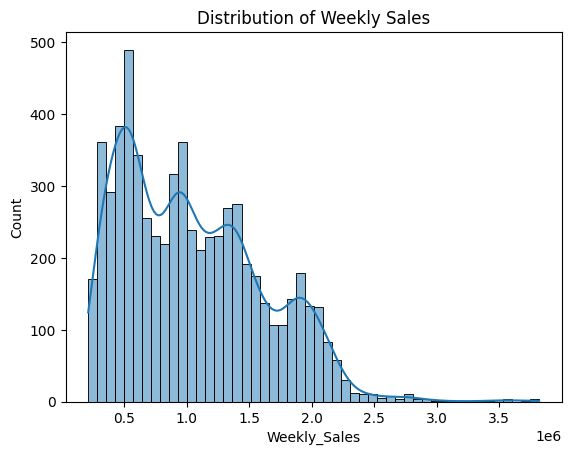

In [127]:
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()

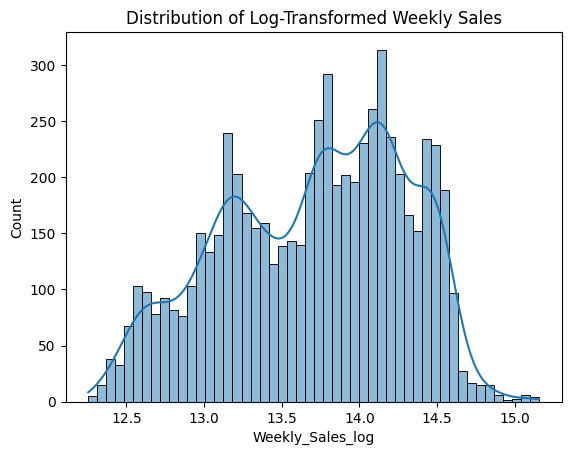

In [128]:
#Log transform for right skewness
df['Weekly_Sales_log'] = np.log1p(df['Weekly_Sales'])
sns.histplot(df['Weekly_Sales_log'], bins=50, kde=True)
plt.title("Distribution of Log-Transformed Weekly Sales")
plt.show()

In [129]:
print("Skewness after log-transform:", stats.skew(df['Weekly_Sales_log']))

Skewness after log-transform: -0.3055056215793514


In [130]:
df.drop(columns="Weekly_Sales", inplace=True)

In [132]:
#Train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Weekly_Sales_log'])
y = df['Weekly_Sales_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
X_train

Store  Temperature  Fuel_Price         CPI  Unemployment  \
1033      8        75.32       2.582  214.878556         6.315   
915       7        20.70       3.372  192.058484         8.818   
5903     42        61.24       3.130  126.546161         9.003   
2083     15        69.19       3.906  136.213613         7.806   
5943     42        87.40       3.743  129.240581         8.257   
...     ...          ...         ...         ...           ...   
3772     27        39.32       3.420  137.251185         7.827   
5191     37        54.44       2.708  210.376263         8.476   
5226     37        86.71       3.684  214.297294         8.177   
5390     38        44.64       3.428  130.071032        12.890   
860       7        27.28       2.550  189.534100         9.014   

      Is_Holiday_Season  Is_SuperBowl  Is_LaborDay  Is_Thanksgiving  Day  \
1033                  0             0            0                0   17   
915                   0             0            0                0   11   
5903                  1             0            0                0   12   
2083                  0             0            0                0   26   
5943                  0             0            0                0   19   
...                 ...           ...          ...              ...  ...   
3772                  0             0            0                0   18   
5191                  1             0            0                0    3   
5226                  0             0            0                0    5   
5390                  0             0            0                0   30   
860                   0             0            0                0   19   

      Month  Holiday_Temp  Holiday_Fuel  Unemp_Fuel  
1033      9          0.00         0.000   16.305330  
915       3          0.00         0.000   29.734296  
5903     11         61.24         3.130   28.179390  
2083      8          0.00         0.000   30.490236  
5943      8          0.00         0.000   30.905951  
...     ...           ...           ...         ...  
3772      2          0.00         0.000   26.768340  
5191     12         54.44         2.708   22.953008  
5226      8          0.00         0.000   30.124068  
5390     12          0.00         0.000   44.186920  
860       2          0.00         0.000   22.985700  

[5148 rows x 14 columns]

In [136]:
#Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Elastic Net": ElasticNet(alpha=0.001, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))
    print("-" * 40)

In [156]:
for name, model in models.items():
    if name in ["Linear Regression", "Ridge Regression", "Lasso Regression", "Elastic Net"]:
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

    evaluate_model(y_test, predictions, name)

Linear Regression
RMSE: 0.5537695086888189
MAE: 0.4615458503521295
R²: 0.14132036685665117
----------------------------------------
Ridge Regression
RMSE: 0.5538129972293162
MAE: 0.46160097138919126
R²: 0.1411854941714974
----------------------------------------
Lasso Regression
RMSE: 0.5553436889807579
MAE: 0.46331629547876624
R²: 0.13643155383279504
----------------------------------------
Elastic Net
RMSE: 0.5548135574311853
MAE: 0.4627294698552391
R²: 0.13807949321573332
----------------------------------------
Random Forest
RMSE: 0.07605518602478482
MAE: 0.04882704088558917
R²: 0.9838031429400739
----------------------------------------
Gradient Boosting
RMSE: 0.09802100877122678
MAE: 0.07441097647720012
R²: 0.9730963367072226
----------------------------------------


## Conclusion

The analysis shows a clear divide in model performance:  

- **Linear models (Linear, Ridge, Lasso, Elastic Net)**  
  Performed poorly with R² ≈ 0.14, meaning they failed to capture the true relationship between features and sales.  

- **Tree-based models (Random Forest, Gradient Boosting)**  
  Performed exceptionally well. Random Forest (R² ≈ 0.98) and Gradient Boosting (R² ≈ 0.97) successfully captured complex patterns like seasonality and holiday effects that linear models missed.  
